# Bitpattern histogram linquant vs logquant

In [4]:
using PyPlot, BitInformation, LinLogQuantization
using Statistics, StatsBase, NetCDF

In [29]:
path = "/network/aopp/chaos/pred/kloewer/esowc/cams/"
filelist = filter(x->endswith(x,"_v3.nc"),readdir(path))
varname = "no2"
file = filelist[[occursin(varname,f) for f in filelist]][1]

# load file
ncfile = NetCDF.open(joinpath(path,file))
X = ncfile.vars[varname][:,2:end-1,:];

In [113]:
lin = LinQuant24Array(X)
log = LogQuant24Array(X);

In [109]:
lin_bitpatterns = Array{UInt24}(undef,size(X)...)
log_bitpatterns = Array{UInt24}(undef,size(X)...)

for (ivert,L) in enumerate(lin)
    lin_bitpatterns[:,:,ivert] = lin[ivert].A
    log_bitpatterns[:,:,ivert] = log[ivert].A
end

lin_bitpatterns = vec(lin_bitpatterns)
log_bitpatterns = vec(log_bitpatterns);

In [114]:
lin_bitpatterns = vec(lin.A)
log_bitpatterns = vec(log.A);

In [119]:
H1 = fit(Histogram,lin_bitpatterns,collect(-0.5:2^8:2^24-.5))
H2 = fit(Histogram,log_bitpatterns,collect(-0.5:2^8:2^24-.5))

Histogram{Int64, 1, Tuple{Vector{Float64}}}
edges:
  [-0.5, 255.5, 511.5, 767.5, 1023.5, 1279.5, 1535.5, 1791.5, 2047.5, 2303.5  …  1.67749115e7, 1.67751675e7, 1.67754235e7, 1.67756795e7, 1.67759355e7, 1.67761915e7, 1.67764475e7, 1.67767035e7, 1.67769595e7, 1.67772155e7]
weights: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
closed: left
isdensity: false

In [116]:
linentropy = round(entropy(H1.weights/prod(size(X)),2),digits=1)
logentropy = round(entropy(H2.weights/prod(size(X)),2),digits=1)

23.1

In [117]:
linentropy

16.4

## PLOTTING

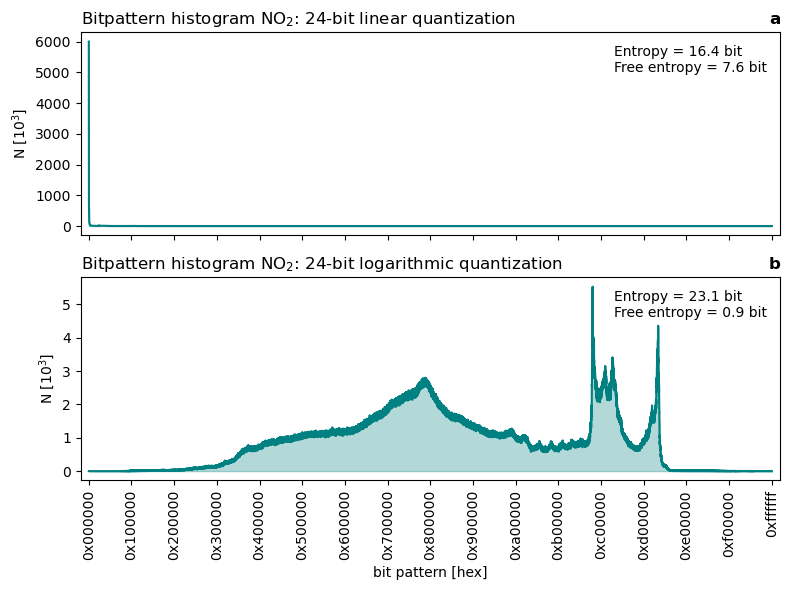

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [125]:
fig,(ax1,ax2) = subplots(2,1,sharex=true,figsize=(8,6))

x = 0:2^8:2^24-1
n = 1e3

ax1.plot(x,H1.weights/n,color="teal")
ax2.plot(x,H2.weights/n,color="teal")

ax1.fill_between(x,H1.weights/n,alpha=.3,color="teal")
ax2.fill_between(x,H2.weights/n,alpha=.3,color="teal")

xtiks = vcat(collect(0:2^20:2^24-1),2^24-1)
ax2.set_xticks(xtiks)
ax2.set_xticklabels(repr.(UInt24.(xtiks)),rotation=90)

ax1.set_title(L"Bitpattern histogram NO$_2$: 24-bit linear quantization",loc="left")
ax2.set_title(L"Bitpattern histogram NO$_2$: 24-bit logarithmic quantization",loc="left")
ax1.set_title("a",loc="right",fontweight="bold")
ax2.set_title("b",loc="right",fontweight="bold")

ax1.set_ylabel(L"N [10$^3$]")
ax2.set_ylabel(L"N [10$^3$]")

ax1.legend(title="Entropy = $linentropy bit\nFree entropy = $(round(24-linentropy,digits=1)) bit",framealpha=0,loc=1)
ax2.legend(title="Entropy = $logentropy bit\nFree entropy = $(round(24-logentropy,digits=1)) bit",framealpha=0,loc=1)

ax1.set_xlim(-2e5,2^24+2e5)
ax2.set_xlabel("bit pattern [hex]")
tight_layout()